In [4]:
!pip install keras-tuner==1.4.7
!pip install pandas==2.1.4
!pip install numpy==1.26.4
!pip install tensorflow==2.15.0

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras #desde tensorflow 2 se importa keras,  como paquete integrado de tensorflow
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
import tensorflow as tf
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense,Flatten,LSTM,RepeatVector,TimeDistributed#, GRUCellV2
from copy import deepcopy


In [3]:

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Reading the data set, parsing the dates and inferring the date format to date time. We also fill the Nan’s with 0.
#agrego index_col=0 para solucionar Unnamed: 0 porque https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe
dataset = read_csv("/content/drive/MyDrive/a Tesis de Grado/Tesis Versiones/tesis 2024/UA/tum transmedia/preprocesamiento/outlier/salidaCSV/salidaKNN2024_15Octubre.csv", index_col=0)
#dataset.fillna(0, inplace=True)//pasar nans a ceros
print(dataset.size)
print(dataset.columns)

print(dataset.shape)
print(dataset)
dataset.head()

58888
Index(['Número de vistas de página', 'Usuarios nuevos', 'Usuarios',
       'Número de sesiones por usuario', 'Sesiones', 'Argentina',
       'Otros Paises', 'mobile', 'desktop', 'tablet',
       'Categoría de dispositivo promedio', 'Categoría de dispositivo std',
       'Windows', 'Android', 'Linux', 'Macintosh',
       'Sistema operativo (not set)', 'iOS', 'Windows Phone', 'Chrome OS',
       'Tizen', 'Sistema operativo promedio', 'Sistema operativo std',
       'Organic Search', 'Social', 'Direct', 'Referral',
       'Agrupación de canales predeterminada promedio',
       'Agrupación de canales predeterminada std', 'mediana_de_medianas',
       'lag_90', 'lag_180', 'lag_270', 'lag_360'],
      dtype='object')
(1732, 34)
      Número de vistas de página  Usuarios nuevos  Usuarios  \
0                          200.0             23.0      23.0   
1                           70.0             29.0      33.0   
2                          323.0             20.0      27.0   
3         

,Número de vistas de página,Usuarios nuevos,Usuarios,Número de sesiones por usuario,Sesiones,Argentina,Otros Paises,mobile,desktop,tablet,...,Social,Direct,Referral,Agrupación de canales predeterminada promedio,Agrupación de canales predeterminada std,mediana_de_medianas,lag_90,lag_180,lag_270,lag_360
0,200.0,23.0,23.0,1.217391,28.0,200.0,0.0,23.0,177.0,0.0,...,6.0,179.0,0.0,50.00,74.669270,22.024332,32.2905,33.648197,34.116962,34.36589
1,70.0,29.0,33.0,1.121212,37.0,69.0,1.0,29.0,41.0,0.0,...,7.0,45.0,0.0,17.50,17.124544,22.024332,32.2905,33.648197,34.116962,34.36589
2,323.0,20.0,27.0,1.333333,36.0,320.0,3.0,28.0,295.0,0.0,...,1.0,302.0,2.0,80.75,127.916720,22.024332,32.2905,33.648197,34.116962,34.36589
3,151.0,10.0,15.0,1.200000,18.0,149.0,2.0,44.0,107.0,0.0,...,0.0,145.0,0.0,37.75,61.969246,22.024332,32.2905,33.648197,34.116962,34.36589
4,37.0,12.0,13.0,1.153846,15.0,37.0,0.0,18.0,19.0,0.0,...,11.0,21.0,0.0,9.25,7.822244,22.024332,32.2905,33.648197,34.116962,34.36589


In [7]:
print(dataset.columns)
print(dataset.shape)
print(dataset.head())

Index(['Número de vistas de página', 'Usuarios nuevos', 'Usuarios',
       'Número de sesiones por usuario', 'Sesiones', 'Argentina',
       'Otros Paises', 'mobile', 'desktop', 'tablet',
       'Categoría de dispositivo promedio', 'Categoría de dispositivo std',
       'Windows', 'Android', 'Linux', 'Macintosh',
       'Sistema operativo (not set)', 'iOS', 'Windows Phone', 'Chrome OS',
       'Tizen', 'Sistema operativo promedio', 'Sistema operativo std',
       'Organic Search', 'Social', 'Direct', 'Referral',
       'Agrupación de canales predeterminada promedio',
       'Agrupación de canales predeterminada std', 'mediana_de_medianas',
       'lag_90', 'lag_180', 'lag_270', 'lag_360'],
      dtype='object')
(1732, 34)
   Número de vistas de página  Usuarios nuevos  Usuarios  \
0                       200.0             23.0      23.0   
1                        70.0             29.0      33.0   
2                       323.0             20.0      27.0   
3                       151.

In [8]:
#predictor Flag
from copy import deepcopy
from datetime import datetime as dt


In [9]:
# mediana
dataset['mediana Dispositivos'] = dataset[['mobile', 'desktop', 'tablet']].median(axis=1)
dataset['mediana Sistema operativo'] = dataset[['Windows', 'Android', 'Linux',
       'Macintosh', 'Sistema operativo (not set)', 'iOS', 'Windows Phone',
       'Chrome OS', 'Tizen']].median(axis=1)
dataset['mediana Agrupación de canales predeterminada'] = dataset[['Organic Search', 'Social', 'Direct',
       'Referral']].median(axis=1)
dataset.columns

Index(['Número de vistas de página', 'Usuarios nuevos', 'Usuarios',
       'Número de sesiones por usuario', 'Sesiones', 'Argentina',
       'Otros Paises', 'mobile', 'desktop', 'tablet',
       'Categoría de dispositivo promedio', 'Categoría de dispositivo std',
       'Windows', 'Android', 'Linux', 'Macintosh',
       'Sistema operativo (not set)', 'iOS', 'Windows Phone', 'Chrome OS',
       'Tizen', 'Sistema operativo promedio', 'Sistema operativo std',
       'Organic Search', 'Social', 'Direct', 'Referral',
       'Agrupación de canales predeterminada promedio',
       'Agrupación de canales predeterminada std', 'mediana_de_medianas',
       'lag_90', 'lag_180', 'lag_270', 'lag_360', 'mediana Dispositivos',
       'mediana Sistema operativo',
       'mediana Agrupación de canales predeterminada'],
      dtype='object')

In [10]:
#115*0.75 = 86.25=86
#train_df,test_df = dataset[1:86], dataset[86:]
# parrtir en 80 - 20 segun la profe
# probar sin normalizar los datos, es decir sin escalarlos
#normalizar
#partir datos de entrenamiento y prueba
#dataset.shape[0]=1734 o es 115 en caso del ejemplo
print('dataset.shape[0]',dataset.shape[0],' dataset.shape[1]',dataset.shape[1])
formaFinal=int(dataset.shape[0]*0.80)#80% para train y 20% para test
print(formaFinal)
train_df,test_df = dataset[1:formaFinal], dataset[formaFinal:] #spliteo test/train
train = train_df
test = test_df
# Normalización del conjunto de entrenamiento
train_previo_zscore = deepcopy(train)
for column in train.columns:
    mean = train[column].mean()  # Media del conjunto de entrenamiento
    std = train[column].std()    # Desviación estándar del conjunto de entrenamiento
    train[column] = (train[column] - mean) / std

# Normalización del conjunto de prueba
test_previo_zscore = deepcopy(test)
for column1 in test.columns:
    mean_train = train_previo_zscore[column1].mean()  # Media del conjunto de entrenamiento
    std_train = train_previo_zscore[column1].std()    # Desviación estándar del conjunto de entrenamiento
    if std_train != 0:
        test[column1] = (test[column1] - mean_train) / std_train
    else:
        test[column1] = 0

print('train_df',train_df.shape)
print('test_df',test_df.shape)
print('test',test.shape,test.values[11])


dataset.shape[0] 1732  dataset.shape[1] 37
1385
train_df (1384, 37)
test_df (347, 37)
test (347, 37) [-0.28188448 -0.31024016 -0.10267335 -0.18512938 -0.12617887 -0.29101081
 -0.09999338 -0.17540146 -0.28608091 -0.14737318 -0.28188448 -0.34697995
 -0.22903589 -0.13934755 -0.20589902 -0.32853022 -0.22470397 -0.34408828
 -0.07658328 -0.05254597 -0.08631562 -0.28188448 -0.27961988 -0.2072422
 -0.34712223 -0.12019942 -0.43381454 -0.28188448 -0.24726852  0.7397365
 -0.20198633 -0.75733207  2.11719443  0.93287724  0.01170602 -0.23517457
 -0.18733395]


<ipython-input-10-6ad1366a2471>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[column] = (train[column] - mean) / std
<ipython-input-10-6ad1366a2471>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[column1] = (test[column1] - mean_train) / std_train


In [11]:
#reshape a entrada

def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    #past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    #window_start cuando comienza  past_end es cuando termina y future_endes cuando termina las series a comparar, 0 es porque solo va a tomar la primera columna
    #la cual es la de total de vistas
    past, future = series[window_start:past_end, :], series[past_end:future_end, 0]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

#For this case, let’s assume that given the past 10 days observation, we need to forecast the next 5 days observations.
'''
n_past = 50 #va a mirar 10 dias al pasado para predecir x dias a futuro
n_future = 7 #anterior 5 #probar 7 dias a futuro
n_features = dataset.shape[1] # Columnas totales del dataset

#Now convert both the train and test data into samples using the split_series function.

X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
#y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], 1)) #no hace falta reshapear
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
#y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], 1)) #no hace falta reshapear
print('X_train',X_train.shape,X_train)
print('y_train',y_train.shape,y_train)
print('X_test',X_test.shape,X_test)
print('y_test',y_test.shape,y_test)
'''

"\nn_past = 50 #va a mirar 10 dias al pasado para predecir x dias a futuro\nn_future = 7 #anterior 5 #probar 7 dias a futuro\nn_features = dataset.shape[1] # Columnas totales del dataset\n\n#Now convert both the train and test data into samples using the split_series function.\n\nX_train, y_train = split_series(train.values,n_past, n_future)\nX_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))\n#y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))\ny_train = y_train.reshape((y_train.shape[0], y_train.shape[1], 1)) #no hace falta reshapear\nX_test, y_test = split_series(test.values,n_past, n_future)\nX_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))\n#y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))\ny_test = y_test.reshape((y_test.shape[0], y_test.shape[1], 1)) #no hace falta reshapear\nprint('X_train',X_train.shape,X_train)\nprint('y_train',y_train.shape,y_train)\nprint('X_test',X_test.shape,X_te

In [ ]:
!pip install keras-tuner -q

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         236G   35G  202G  15% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
/dev/sda1       242G   59G  184G  25% /opt/bin/.nvidia
tmpfs           6.4G  524K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive           100G   56G   45G  56% /content/drive


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.156
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi

In [ ]:
!cat /proc/meminfo

MemTotal:       13290460 kB
MemFree:          251916 kB
MemAvailable:   10160496 kB
Buffers:          561436 kB
Cached:          9274572 kB
SwapCached:            0 kB
Active:          1612276 kB
Inactive:       10634496 kB
Active(anon):       2268 kB
Inactive(anon):  2433896 kB
Active(file):    1610008 kB
Inactive(file):  8200600 kB
Unevictable:          20 kB
Mlocked:              20 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              2040 kB
Writeback:             0 kB
AnonPages:       2410836 kB
Mapped:           994624 kB
Shmem:             25388 kB
KReclaimable:     423376 kB
Slab:             506296 kB
SReclaimable:     423376 kB
SUnreclaim:        82920 kB
KernelStack:        8352 kB
PageTables:        32156 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6645228 kB
Committed_AS:    5316244 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       86516 kB
VmallocChunk:    

In [ ]:
!/usr/local/cuda/bin/nvcc --version



nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
!which nvidia-smi

/opt/bin/nvidia-smi


In [ ]:
!nvidia-smi

Tue Oct 15 21:34:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0              29W /  70W |    643MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!python --version

Python 3.10.12


In [12]:
import keras_tuner as kt
import datetime
from datetime import timedelta
from pytz import timezone
import tensorflow.keras.backend as K
import datetime
from datetime import timedelta
from pytz import timezone
print(tf. __version__)
print(pd. __version__)
print(np. __version__)
print(kt. __version__)

2.15.0
2.1.4
1.26.4
1.4.7


In [13]:
# Establecer la semilla
seed_value = 42
import random  
# Establecer semillas
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

In [ ]:
print('std',train_previo_zscore['Número de vistas de página'].std())
print('mean',train_previo_zscore['Número de vistas de página'].mean() )

std 46.969185436927425
mean 34.23988439306358


In [ ]:
from tensorflow.keras.saving import register_keras_serializable
media_train=train_previo_zscore['Número de vistas de página'].std()
std_train=train_previo_zscore['Número de vistas de página'].mean()
#esta metrica esta en el codigo de github del ganador
@register_keras_serializable()
def smape_loss(y_true, y_pred):
    #revierto zscore
    global media_train
    global std_train
    y_true=(y_true*std_train)+media_train
    y_pred=(y_pred*std_train)+media_train
    #revierto log1p
    y_true=tf.math.expm1(y_true)
    y_pred=tf.math.expm1(y_pred)
    epsilon = 0.1
    y_pred = tf.convert_to_tensor(y_pred)
    y_true = tf.cast(y_true, y_pred.dtype)
    # Calcular el denominador de SMAPE
    summ = tf.maximum(tf.abs(y_true) + tf.abs(y_pred) + epsilon, 0.5 + epsilon)

    # Calcular SMAPE
    smape = tf.abs(y_pred - y_true) / summ * 2.0

    # Retornar la media de SMAPE
    return K.mean(smape, axis=-1)

@register_keras_serializable()
def mae_denorm(y_true, y_pred):
    #revierto zscore
    global media_train
    global std_train
    y_true1=(y_true*std_train)+media_train
    y_pred1=(y_pred*std_train)+media_train
    #revierto log1p
    y_true2=tf.math.expm1(y_true1)
    y_pred2=tf.math.expm1(y_pred1)

    return tf.keras.losses.mean_absolute_error(y_true2, y_pred2)

In [14]:
from tensorflow.keras.saving import register_keras_serializable
#esta metrica esta en el codigo de github del ganador
media_train=train_previo_zscore['Número de vistas de página'].std()
std_train=train_previo_zscore['Número de vistas de página'].mean()
@register_keras_serializable()
def smape_loss(y_true, y_pred):
    #revierto zscore
    global media_train
    global std_train
    y_true=(y_true*std_train)+media_train
    y_pred=(y_pred*std_train)+media_train
    epsilon = 0.1
    y_pred = tf.convert_to_tensor(y_pred)
    y_true = tf.cast(y_true, y_pred.dtype)
    # Calcular el denominador de SMAPE
    summ = tf.maximum(tf.abs(y_true) + tf.abs(y_pred) + epsilon, 0.5 + epsilon)

    # Calcular SMAPE
    smape = tf.abs(y_pred - y_true) / summ * 2.0

    # Retornar la media de SMAPE
    return K.mean(smape, axis=-1)

@register_keras_serializable()
def mae_denorm(y_true, y_pred):
    #revierto zscore
    global media_train
    global std_train
    y_true1=(y_true*std_train)+media_train
    y_pred1=(y_pred*std_train)+media_train

    return tf.keras.losses.mean_absolute_error(y_true1, y_pred1)

In [15]:
#el mejor modelo de verdad
pathModelosJsonMejor="/content/drive/MyDrive/a Tesis de Grado/Tesis Versiones/tesis 2024/UA/tum transmedia/modelos/modelos resultados/mejores modelos guardados/modelo"
nombreMejorModeloMejor="/ ndays60hyperband huber - mae 60.h5"#el mejor modelo es el hyperband de 28 dias y 107 época
n_past=60
cambio=datetime.datetime.now(timezone('UTC')) - timedelta(hours=3)
tiempoFinal=f"{cambio:%Y-%m-%d %H:%M:%S }"
print('Tiempo  Inicio y n_past',tiempoFinal , ' n_past:-->',n_past)
n_future = 60
n_features = train.shape[1]
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], 1)) #no hace falta reshapear
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], 1)) #no hace falta reshapear

reconstructed_model3 = tf.keras.models.load_model(pathModelosJsonMejor+nombreMejorModeloMejor,custom_objects={'smape_loss':smape_loss,'mae_denorm':mae_denorm})

Tiempo  Inicio y n_past 2024-10-22 16:01:05   n_past:--> 60


In [16]:
print("Evaluate on test data")
results = reconstructed_model3.evaluate(X_test,y_test, batch_size=256)
print("test loss", results)

Evaluate on test data
1/1 [==============================] - 4s 4s/step - loss: 0.0677 - mae_denorm: 9.6768 - smape_loss: 0.2456
test loss [0.06773004680871964, 9.676756858825684, 0.24562634527683258]


In [31]:
pred_e1d1=reconstructed_model3.predict(X_test)
pred_e1d1=deepcopy(pred_e1d1)
reshapePred=pred_e1d1.reshape((pred_e1d1.shape[0]*pred_e1d1.shape[2]),pred_e1d1.shape[1])
reshapeY_test=y_test.reshape((y_test.shape[0]*y_test.shape[2]),y_test.shape[1])
print(pred_e1d1.shape,reshapePred.shape)
print('y_test',y_test.shape,reshapeY_test.shape)
def smape2(a, f):
    print('len(a)',len(a))

    #std=train_previo_zscore['Predictor Flag'].std()
    #media=train_previo_zscore['Predictor Flag'].mean()
    std=train_previo_zscore['Número de vistas de página'].std()
    media=train_previo_zscore['Número de vistas de página'].mean()
    #revierto zscore
    a=(a*std)+media
    f=(f*std)+media

    print('a',a)
    print('f',f)
    return (1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))) )

def mae_manual(a, f):
    print('len(a)', len(a))

    # Obtener la desviación estándar y media
    std = train_previo_zscore['Número de vistas de página'].std()
    media = train_previo_zscore['Número de vistas de página'].mean()

    # Revertir z-score
    a = (a * std) + media
    f = (f * std) + media

    diff =np.abs(a-f)
    return np.mean(diff)#(1 / len(a)) * np.sum(diff)

def rmse_manual(a, f):
    print('len(a)', len(a))

    # Obtener la desviación estándar y media
    std = train_previo_zscore['Número de vistas de página'].std()
    media = train_previo_zscore['Número de vistas de página'].mean()

    # Revertir z-score
    a = (a * std) + media
    f = (f * std) + media


    # Calcular el RMSE (Error Cuadrático Medio)
    diff = np.square(a - f)  # Cuadrado de la diferencia
    mse = np.mean(diff)  # Error Cuadrático Medio
    rmse_calculado = np.sqrt(mse)  # Raíz cuadrada del MSE
    #for i in range(len(a)):
    #  print(f"a[{i}] = {a[i][0]}, f[{i}] = {f[i][0]}")

    return rmse_calculado

auxpred=reshapePred.reshape((y_test.shape[0]*y_test.shape[1]),1)
auxpred2=auxpred.reshape((auxpred.shape[0]),)
auxY_test=reshapeY_test.reshape((y_test.shape[0]*y_test.shape[1]),1)
print(auxpred.shape)
print('smape',smape2(auxY_test,auxpred))
print('mae',mae_manual(auxY_test,auxpred))
print('rmse',rmse_manual(auxY_test,auxpred))
print(auxpred2.shape)
print(np.array([1,2,3]).shape)
print(auxpred2)

8/8 [==============================] - 0s 5ms/step
(228, 60, 1) (228, 60)
y_test (228, 60, 1) (228, 60)
(13680, 1)
len(a) 13680
a [[34.]
 [ 6.]
 [ 4.]
 ...
 [62.]
 [34.]
 [81.]]
f [[30.750443]
 [24.34592 ]
 [24.846825]
 ...
 [43.880898]
 [43.849274]
 [43.825184]]
smape 0.6972292246352332
len(a) 13680
mae 13.274267093758834
len(a) 13680
rmse 17.523084885859184
(13680,)
(3,)
[-0.07429212 -0.21064794 -0.19998342 ...  0.20526259  0.20458929
  0.20407636]


In [ ]:
test_previo_log1p['Número de vistas de página']
X_test5, y_test5 = split_series(test_previo_log1p.values,n_past, n_future)
y_test5

array([[ 34.,   6.,   4., ...,  56.,  34.,  15.],
       [  6.,   4.,  13., ...,  34.,  15.,  16.],
       [  4.,  13.,  94., ...,  15.,  16.,   9.],
       ...,
       [ 20., 100.,  25., ...,   9.,  50.,  62.],
       [100.,  25.,  17., ...,  50.,  62.,  34.],
       [ 25.,  17.,  29., ...,  62.,  34.,  81.]])

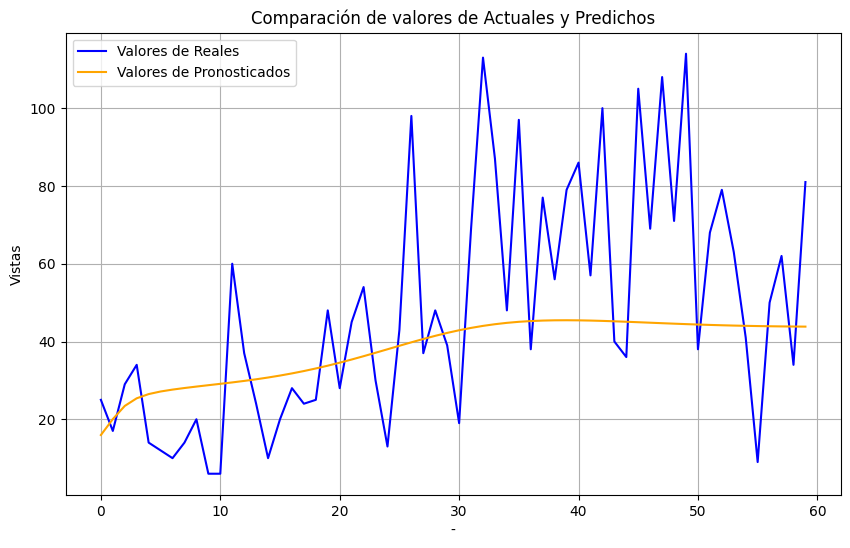

In [32]:
# Obtener la desviación estándar y media
import matplotlib.pyplot as plt
std = train_previo_zscore['Número de vistas de página'].std()
media = train_previo_zscore['Número de vistas de página'].mean()

# Revertir z-score
denorm_actually=(auxY_test*std)+media
denorm_forecast=(auxpred*std)+media
#for i in range(len(denorm_actually)):
#    print(f"a[{i}] = {a[i][0]}, f[{i}] = {f[i][0]}")
# Supongamos que a y f son tus arrays
# Convertimos a y f a arrays de NumPy si no lo son
denorm_actually = np.array(denorm_actually)
denorm_forecast = np.array(denorm_forecast)

# Crear un rango de índices para el eje x
x = np.arange(len(denorm_actually))

# Crear el plot
plt.figure(figsize=(10, 6))
plt.plot( denorm_actually[-60:], label='Valores de Reales', color='blue')
plt.plot( denorm_forecast[-60:], label='Valores de Pronosticados', color='orange')


plt.title('Comparación de valores de Actuales y Predichos')
plt.xlabel('-')
plt.ylabel('Vistas')
plt.legend()
plt.grid()
plt.show()


In [30]:
mae_manual(auxY_test[-60:],auxpred[-60:])

len(a) 60


20.811911869049073